Predict whether a person will have diabetes or not using KNN

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As zeroes not accepted, replace zeroes with np.NaN

In [6]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_not_accepted:
    df[col]=df[col].replace(0,np.NaN)
    mean=int(df[col].mean(skipna=True))
    df[col]=df[col].fillna(mean)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
knn=KNeighborsClassifier(1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred=knn.predict(X_test)

In [16]:
error_rate=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [18]:
error_rate

[0.24675324675324675,
 0.2532467532467532,
 0.21428571428571427,
 0.2012987012987013,
 0.24025974025974026,
 0.21428571428571427,
 0.2077922077922078,
 0.18181818181818182,
 0.2012987012987013,
 0.19480519480519481,
 0.18181818181818182,
 0.2012987012987013,
 0.18181818181818182,
 0.2012987012987013,
 0.18831168831168832,
 0.21428571428571427,
 0.21428571428571427,
 0.2077922077922078,
 0.22077922077922077,
 0.21428571428571427,
 0.22077922077922077,
 0.2077922077922078,
 0.21428571428571427,
 0.21428571428571427,
 0.2077922077922078,
 0.22077922077922077,
 0.18181818181818182,
 0.19480519480519481,
 0.2012987012987013]

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error rRate')

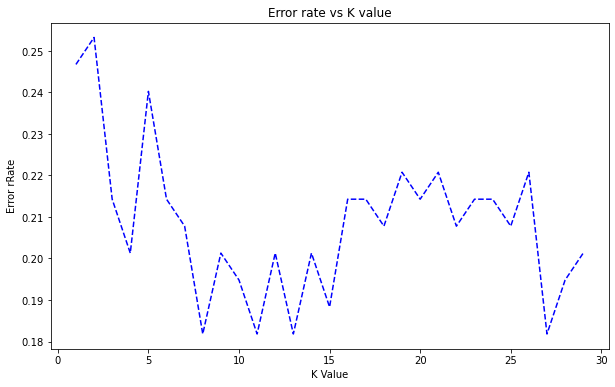

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed')
plt.title('Error rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Error rRate')

We have to take K value where the error rate is minimum, so from above chart, K=8 has min error rate

In [27]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [28]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

[[98  9]
 [19 28]]


In [30]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154

[[94 13]
 [15 32]]
